In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model, load_model 
# from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from tensorflow.keras.utils import to_categorical

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
import time

driver = webdriver.Chrome("chromedriver")
# 인스타그램 접속하기
driver.get("http://www.instargram.com")

#로딩하는데 시간이 걸릴 수 있으므로 3초간 대기
time.sleep(3)

In [4]:
# 인스타계정으로 로그인

# id, pass 입력
driver.find_element(By.NAME, "username").send_keys("tt_bdata_sm")
driver.find_element(By.NAME, "password").send_keys("92skatnals!I")

driver.find_element(By.XPATH, "//*[@id='loginForm']/div/div[3]/button/div").click()

In [5]:
driver.find_element(By.CLASS_NAME, "_ac8f").click()

In [6]:
driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]").click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]"}
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x002EF243]
	(No symbol) [0x00277FD1]
	(No symbol) [0x0016D04D]
	(No symbol) [0x0019C0B0]
	(No symbol) [0x0019C22B]
	(No symbol) [0x001CE612]
	(No symbol) [0x001B85D4]
	(No symbol) [0x001CC9EB]
	(No symbol) [0x001B8386]
	(No symbol) [0x0019163C]
	(No symbol) [0x0019269D]
	GetHandleVerifier [0x00589A22+2655074]
	GetHandleVerifier [0x0057CA24+2601828]
	GetHandleVerifier [0x00398C0A+619850]
	GetHandleVerifier [0x00397830+614768]
	(No symbol) [0x002805FC]
	(No symbol) [0x00285968]
	(No symbol) [0x00285A55]
	(No symbol) [0x0029051B]
	BaseThreadInitThunk [0x764000F9+25]
	RtlGetAppContainerNamedObjectPath [0x77D17BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77D17B8E+238]
	(No symbol) [0x00000000]


In [7]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [8]:
word = '커피차'
url = searching(word)
driver.get(url)

In [9]:
def click_first(driver):
    first = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]").click()
    time.sleep(3)
click_first(driver)

In [10]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div._a9zs > span')[0].text
    except:
        content = ''

    # 3. 태그, 좋아요 수 , 아이디 정보 가져오기
    
    # 태그
    tags = re.findall(r'#[^\s#,\\]+', content)  


    #  좋아요 수 가져오기 (텍스트로 표시되는 좋아요 수도 크롤링 가능)
#     try:
#         like = soup.select('section._ae5m')[0].text[4:-1]

#     except:
#         like = 0

    like_search = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_ae5m")))
    like_start = driver.find_element(By.CLASS_NAME,"_ae5m").text
    
    if like_start[:3] == "좋아요":
        like = like_start[4:-1]
    elif like_start[:3] == "가장 ":
        like = 0
    else:
        like_search.find_elements(By.CLASS_NAME, "x1i10hfl")[1].click()
        time.sleep(6)
        
        driver.find_element(By.CLASS_NAME, "x7r02ix").find_elements(By.CLASS_NAME, "_ab8w")[1]
        like_list = driver.find_elements(By.CLASS_NAME, "_ab8w")
        like = len(like_list)  
        
        driver.find_elements(By.CLASS_NAME, "_ac7b")[1].click()

        time.sleep(3)
    
        
    # 아이디정보
    user_id = soup.select('div._aaqt')[0].text

    # 4. 저장하기
    data = [user_id, content, tags, like]
    return data

get_content(driver)

['coffee_sisters20',
 '안녕하세요~이번에 커피시스터즈가 다녀온 곳은 전라남도 무안에 위치한 무안교육지원청 입니다🏢🏢🏢출근길 커피차☕️☕️☕️특별한 직원 복지현장에맛있는 쿠키와🍪🍪🍪음료를 싣고🥤🥤🥤커피시스터즈 출동했습니다직원분들 수고 많으셨습니다커피 한잔 할래요?교육장 김선치직원 사랑 가득담은🧡🧡🧡배너와 현수막 설치후시스터카 예쁘게 변신완료😎😎😎연예인들만 받는줄 알았던커피차가 왔다고커피트럭과 배너앞에서 인증샷 찰칵찰칵📸📸📸직원분들 너무나 좋아해주시고 음료 맛있다고 칭찬해주셔서 시스터 매니저들도 시종일관 즐겁게 즐겁게😄😄😄오늘의 베스트메뉴는 쿠키와 어울리는 아메리카노와고구마라떼 였습니다 ☕️☕️☕️🍠🍠🍠맛있게 드셔주셔서 감사합니다🥰🥰🥰오늘도 주문과 동시에 척척척 빠르게 만들어 드려 이용하시는데 불편 없으시도록 최선을 다했답니다🤗🤗🤗 커피시스터즈의 출장케이터링은 커피류, 에이드와 티 등 20여종의 다양한 음료와 간식이 준비되어 있습니다🌭🌭🌭🥤🥤🥤🥪🥪🥪☕️☕️☕️🍪🍪🍪합리적인 가격과 친절함으로 여러분들의 행사를 더욱 빛나게 해드리겠습니다💖💖💖#무안교육지원청#김선치교육장#커피차이벤트',
 ['#무안교육지원청', '#김선치교육장', '#커피차이벤트'],
 134]

In [11]:
def next_page1(driver):
    next_page = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div").click()
    time.sleep(3)
next_page1(driver)

In [12]:
def next_page2(driver):
    next_page = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]").click()
    time.sleep(3)
next_page2(driver)

In [37]:
from tqdm.notebook import tqdm

word = "크로플"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result01 = [ ]

# 여러 게시글 수집하기

target = 1000     # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result01.append(data)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)
    except:
        time.sleep(5)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)

C:\Users\user\AppData\Local\Temp\ipykernel_14008\3909037537.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(target)):


  0%|          | 0/5 [00:00<?, ?it/s]

In [38]:
# result_test = pd.DataFrame(result)
# result_test

result_croffle = pd.DataFrame(result01)
result_croffle

,0,1,2,3
0,cafe_flowmood,겨울이니깐요! 넉넉히 10시까지!! 🥞 평일 13:00 - 22:00🥞 주말 13:...,[],147
1,todays_busan,전포동 #데이오브위크실시간 딸기파티 열린전포동 감성 카페🍓 딸기딸기한 크로플에입살녹...,"[#데이오브위크실시간, #오늘의부산_서면]",1509
2,curryslimess,🧇🥐Croffle🥐🧇>open me<• From: @shingibakery• Siz...,"[#shingibakery, #크로플♡♡Tags, #slime, #glossysli...",1108
3,barada_cafe,안녕하세요 바라다입니다 🏡너무 기엽져 블루베리 먹고있는 토끼예용 🐰🫐🍰 조각ᄏ...,[],19
4,cafe_plumber,점점 날이 따뜻해 지는 것 같네요 그에 맞춰서 어제는 크리스마스 장식들을 조금씩 빼...,[],47


In [ ]:
#from tqdm import tqdm_notebook
from tqdm.notebook import tqdm


word = "떡볶이"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result02 = [ ]

# 여러 게시글 수집하기

target = 1000      # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result02.append(data)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)
    except:
        time.sleep(5)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)

C:\Users\user\AppData\Local\Temp\ipykernel_14008\207675061.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(target)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
result_tpk = pd.DataFrame(result02)
result_tpk

In [ ]:
# 소민씨
word = "햄버거"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result02 = [ ]

# 여러 게시글 수집하기

target = 1000      # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result02.append(data)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)
    except:
        time.sleep(5)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)

In [14]:
from tqdm.notebook import tqdm

word = "스시"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result02 = [ ]

# 여러 게시글 수집하기

target = 1000      # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result02.append(data)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)
    except:
        time.sleep(5)
        if i == 0:
            next_page1(driver)
        else:
            next_page2(driver)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
result_sushi = pd.DataFrame(result02)
result_sushi

,0,1,2,3
0,koi_ramens_tokyo,【コスパ最強人気爆発食べ放題】東京編5選！！他投稿▶︎ @koi_ramens_tokyo ...,"[#新宿焼肉ブルズ, #焼肉ブルズ, #新宿焼肉, #焼肉, #肉寿司, #肉寿司食べ放題,...",1530
1,_yamiyomi_,"여러분,,,여기 진짜 [찐으로] 가야합니다 ㅠㅠ2023 신년회는 무조건 여기요🥺마끼...","[#강남, #논현, #스시롭다, #스시, #스시오마카세, #스시맛집, #초밥맛집, ...",2080
2,jostagram_temma,"・土日祝日限定で¥5,500(サ別)のランチ営業されている#寿司処しん さん♫これがまた震え...","[#寿司処しん, #グルメ, #大阪, #大阪グルメ, #天満, #天満グルメ, #天六, ...",1501
3,muk._.kyo,오랜만에 만나도 어제만난 것 같은…친구같이 기분좋은 이대역 갓성비 오마카세 🍣맛있는...,"[#여래여거, #간장게장, #먹교_이대, #이대오마카세, #가성비오마카세, #이대여...",717
4,sanghyeopkim,@sanghyeopkim #sashimori...................#su...,"[#sashimori..................., #sushi, #sushi...",3251
...,...,...,...,...
993,sushimoto_il,תראו איזו הרמוניה!כל הרכיבים בפאד קפאו שלנו מס...,"[#sushi, #sushitime, #sashimi, #sushilovers, #...",10
994,psyence_a_go_go_,.• 2023-01-07#すしや #すし #すし家 #분당 #분당스시야 #분스야 #이정...,"[#すしや, #すし, #すし家, #분당, #분당스시야, #분스야, #이정운셰프, #...",16
995,yomisushiline,"יש דרך אחת לדעת אם סושי אמור להיות טוב, מבלי א...","[#sushi, #sushitime, #sashimi, #sushilovers, #...",31
996,psyence_a_go_go_,.• 2023-01-07#すしや #すし #すし家 #분당 #분당스시야 #분스야 #이정...,"[#すしや, #すし, #すし家, #분당, #분당스시야, #분스야, #이정운셰프, #...",17


In [16]:
result_sushi.to_csv("../data/result_sushi_1000.csv")

In [155]:
# 크롤링 데이터 저장 후 불러오기

crfl=pd.read_csv("../data/result_croffle_1000.csv", index_col = 0)
crfl

,0,1,2,3
0,cafe_flowmood,겨울이니깐요! 넉넉히 10시까지!! 🥞 평일 13:00 - 22:00🥞 주말 13:...,[],143
1,tamatama0820_,"1月6日、""CAFE. and BAR WHEN""で締めパフェ！ 札幌市中央区南5条西6丁...","['#cafeandbarwhen', '#when', '#パフェ', '#いちご', '...",74
2,foodie_in_the_closet,"이번주 사당 꼭 오셔야하는 이유🔥단짠단짠 브라운치즈+아이스크림 크로플,, 찢었다 <...","['#사당맛집', '#사당역맛집', '#사당데이트', '#이수맛집', '#이수역맛집...",3204
3,crashop_wonju,2023년 1월 11일 수요일 라인업입니다~~🥐🥐#원주맛집 #원주혁신도시 #원주빵지...,"['#원주맛집', '#원주혁신도시', '#원주빵지순례', '#원주혁신', '#빵',...",7
4,fufu_coffee_jincheon,#푸푸커피진처점 오늘.#딸기생크림크로플 🍓🥐#브라운치즈크로플 🧀🥐날이네요❗️😍..#...,"['#푸푸커피진처점', '#딸기생크림크로플', '#브라운치즈크로플', '#푸푸커피'...",73
...,...,...,...,...
992,official_cafestairs,오늘도 예쁜 딸기로 하루 시작🍓🍓🍓#딸기라떼 #참빛농원,"['#딸기라떼', '#참빛농원']",12
993,cafe_alberobello,1월8일 일요일 오픈했습니다🍓🍽☕️행복한 일요일 시작 하셨나요? ^^조용한 재즈 들...,"['#카페알베로벨로', '#알베로벨로', '#가평카페', '#마석카페', '#반려견...",5
994,_maru_cafe_,-maru cafe•바스크치즈케이크•쑥인절미케이크•티라미수케이크•크레이프•초코케이크...,"['#강화도', '#마루', '#카페', '#강화도카페', '#강화도여행', '#강...",17
995,cafe_yeonda,카페연다 열었어요!#초코라떼 #아인슈페너 #아이스크림크로플,"['#초코라떼', '#아인슈페너', '#아이스크림크로플']",29


In [156]:
tpk=pd.read_csv("../data/result_tpk_1000.csv", index_col = 0)
tpk

,0,1,2,3
0,mat.cube,(제대로 맛있는 당면 국물 떡볶이) 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛🥺...,"['#송탄', '#세모분식평택에', '#맛큐브_송탄', '#맛큐브_평택', '#떡볶...",1006
1,mukteven_jobs,손오공도 찾으러 다닌다는 드래곤볼떡볶이!!!항상 떡볶이에 진심인 치킨매니아에서또!!...,"['#치킨매니아', '#부산맛집', '#덕천맛집', '#덕천동맛집', '#부산떡볶이...",1992
2,food__some,떡볶이 국물에 빠진 만두! 인천 3대 떡볶이라고 불릴만한 맛이에요.#인천#얼레꼴레만...,"['#인천', '#얼레꼴레만두모녀떡볶이', '#푸썸_인천']",434
3,g.yoooong_place,"피카츄 라이츄 파이리 꼬북이 노래를 아는 아재, 줌마들을 태그 해야 할 것 같은 곳...","['#피카츄분식피카츄분식은', '#떡볶이누가', '#오뎅꼬불꼬불', '#굥플_경기'...",599
4,g.yoooong_place,친구 ’수진‘을 태그하면 꼭 사줘야 하는 곳이 있습니다.경기 성남시 수진역 근처에 ...,"['#수진분식수진분식은', '#떡볶이그', '#김말이', '#계란기본으로', '#굥...",1161
...,...,...,...,...
989,jjung4800000,공구🍢요미녀 떡볶이 구매는@jjung4800000 프로필 링크 클릭 📲집에 있는 재...,"['#맛스타그램', '#쩡_밥상', '#떡볶이', '#저녁', '#공구', '#캠핑...",170
990,chubong_official,추운 겨울 따뜻한 떡의 쫄깃함과...🎆국물의 부드러움을 느끼고 싶다면?😋바로 츄봉의...,"['#츄봉', '#떡볶이', '#메뉴', '#로제', '#국물', '#음식', '#...",82
991,__eos_kitchen,어식당의 골목삼겹살 오-픈 합니다!감칠맛 가득 한돈 삼교비에 어식당꼬막무침을 함께 ...,"['#어식당', '#충주맛집', '#골목삼겹살']",212
992,dahila_jy,..2022.12.31. ~ 2023.01.01...미리 생일파티#두끼떡볶이 #뚝섬...,"['#두끼떡볶이', '#뚝섬포구', '#서울로인서울역', '#떡볶이', '#조개구이...",9


In [18]:
sushi=pd.read_csv("../data/result_sushi_1000.csv", index_col = 0)
sushi

,0,1,2,3
0,koi_ramens_tokyo,【コスパ最強人気爆発食べ放題】東京編5選！！他投稿▶︎ @koi_ramens_tokyo ...,"['#新宿焼肉ブルズ', '#焼肉ブルズ', '#新宿焼肉', '#焼肉', '#肉寿司',...",1530
1,_yamiyomi_,"여러분,,,여기 진짜 [찐으로] 가야합니다 ㅠㅠ2023 신년회는 무조건 여기요🥺마끼...","['#강남', '#논현', '#스시롭다', '#스시', '#스시오마카세', '#스시...",2080
2,jostagram_temma,"・土日祝日限定で¥5,500(サ別)のランチ営業されている#寿司処しん さん♫これがまた震え...","['#寿司処しん', '#グルメ', '#大阪', '#大阪グルメ', '#天満', '#天...",1501
3,muk._.kyo,오랜만에 만나도 어제만난 것 같은…친구같이 기분좋은 이대역 갓성비 오마카세 🍣맛있는...,"['#여래여거', '#간장게장', '#먹교_이대', '#이대오마카세', '#가성비오...",717
4,sanghyeopkim,@sanghyeopkim #sashimori...................#su...,"['#sashimori...................', '#sushi', '#...",3251
...,...,...,...,...
993,sushimoto_il,תראו איזו הרמוניה!כל הרכיבים בפאד קפאו שלנו מס...,"['#sushi', '#sushitime', '#sashimi', '#sushilo...",10
994,psyence_a_go_go_,.• 2023-01-07#すしや #すし #すし家 #분당 #분당스시야 #분스야 #이정...,"['#すしや', '#すし', '#すし家', '#분당', '#분당스시야', '#분스야...",16
995,yomisushiline,"יש דרך אחת לדעת אם סושי אמור להיות טוב, מבלי א...","['#sushi', '#sushitime', '#sashimi', '#sushilo...",31
996,psyence_a_go_go_,.• 2023-01-07#すしや #すし #すし家 #분당 #분당스시야 #분스야 #이정...,"['#すしや', '#すし', '#すし家', '#분당', '#분당스시야', '#분스야...",17


In [ ]:
result_donut

### 1차 전처리
- 컬럼 이름 변경(공통)
- contents 컬럼 특수 문자 뺀 문자열로 변경
- 좋아요 결측치(Nan) -> 0

In [3]:
tpk1=pd.read_csv("../data/result_tpk_1000.csv", index_col = 0, )
tpk1

,0,1,2,3
0,mat.cube,(제대로 맛있는 당면 국물 떡볶이) 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛🥺...,"['#송탄', '#세모분식평택에', '#맛큐브_송탄', '#맛큐브_평택', '#떡볶...",1006
1,mukteven_jobs,손오공도 찾으러 다닌다는 드래곤볼떡볶이!!!항상 떡볶이에 진심인 치킨매니아에서또!!...,"['#치킨매니아', '#부산맛집', '#덕천맛집', '#덕천동맛집', '#부산떡볶이...",1992
2,food__some,떡볶이 국물에 빠진 만두! 인천 3대 떡볶이라고 불릴만한 맛이에요.#인천#얼레꼴레만...,"['#인천', '#얼레꼴레만두모녀떡볶이', '#푸썸_인천']",434
3,g.yoooong_place,"피카츄 라이츄 파이리 꼬북이 노래를 아는 아재, 줌마들을 태그 해야 할 것 같은 곳...","['#피카츄분식피카츄분식은', '#떡볶이누가', '#오뎅꼬불꼬불', '#굥플_경기'...",599
4,g.yoooong_place,친구 ’수진‘을 태그하면 꼭 사줘야 하는 곳이 있습니다.경기 성남시 수진역 근처에 ...,"['#수진분식수진분식은', '#떡볶이그', '#김말이', '#계란기본으로', '#굥...",1161
...,...,...,...,...
989,jjung4800000,공구🍢요미녀 떡볶이 구매는@jjung4800000 프로필 링크 클릭 📲집에 있는 재...,"['#맛스타그램', '#쩡_밥상', '#떡볶이', '#저녁', '#공구', '#캠핑...",170
990,chubong_official,추운 겨울 따뜻한 떡의 쫄깃함과...🎆국물의 부드러움을 느끼고 싶다면?😋바로 츄봉의...,"['#츄봉', '#떡볶이', '#메뉴', '#로제', '#국물', '#음식', '#...",82
991,__eos_kitchen,어식당의 골목삼겹살 오-픈 합니다!감칠맛 가득 한돈 삼교비에 어식당꼬막무침을 함께 ...,"['#어식당', '#충주맛집', '#골목삼겹살']",212
992,dahila_jy,..2022.12.31. ~ 2023.01.01...미리 생일파티#두끼떡볶이 #뚝섬...,"['#두끼떡볶이', '#뚝섬포구', '#서울로인서울역', '#떡볶이', '#조개구이...",9


In [4]:
tpk1.columns = ['ID','Contents','Tags', 'Likes']

#tpk1.index = list(range(1,501))
tpk1.head(5)

,ID,Contents,Tags,Likes
0,mat.cube,(제대로 맛있는 당면 국물 떡볶이) 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛🥺...,"['#송탄', '#세모분식평택에', '#맛큐브_송탄', '#맛큐브_평택', '#떡볶...",1006
1,mukteven_jobs,손오공도 찾으러 다닌다는 드래곤볼떡볶이!!!항상 떡볶이에 진심인 치킨매니아에서또!!...,"['#치킨매니아', '#부산맛집', '#덕천맛집', '#덕천동맛집', '#부산떡볶이...",1992
2,food__some,떡볶이 국물에 빠진 만두! 인천 3대 떡볶이라고 불릴만한 맛이에요.#인천#얼레꼴레만...,"['#인천', '#얼레꼴레만두모녀떡볶이', '#푸썸_인천']",434
3,g.yoooong_place,"피카츄 라이츄 파이리 꼬북이 노래를 아는 아재, 줌마들을 태그 해야 할 것 같은 곳...","['#피카츄분식피카츄분식은', '#떡볶이누가', '#오뎅꼬불꼬불', '#굥플_경기'...",599
4,g.yoooong_place,친구 ’수진‘을 태그하면 꼭 사줘야 하는 곳이 있습니다.경기 성남시 수진역 근처에 ...,"['#수진분식수진분식은', '#떡볶이그', '#김말이', '#계란기본으로', '#굥...",1161


In [5]:
tpk1.iloc[0][1]

content = tpk1.iloc[0][1]
new_content = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", content)

print(new_content)

NameError: name 're' is not defined

In [226]:
tpk1["Contents"][0]

'(제대로 맛있는 당면 국물 떡볶이) 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛🥺 백종원 님도 반한 떡볶이랍니다.💡 #송탄 #세모분식평택에 가면 꼭 먹어줘야 하는 분식집이에요. 국물이 달짝지근하면서도 살짝 매콤한 게 너무 맛있어요. 국물 떡볶인데 국물 양도 넉넉합니다. 당면이랑 떡볶이랑 김밥을 한입에 호로록 먹으면 바로 최애 떡볶이로 등극해요. 생각보다 자극적이지도 않고 너무 맛있어요. 이 국물은 남기면 절대 안되쥬? 김밥 10줄도 국물에 찍먹하면 순삭 가능한 맛이에요. 양도 계란, 야채, 당면 등등 푸짐한 편이에요. 가격도 착하고,, 당면 떡볶이는 필수로 먹을 것,,!💡 경기 평택시 중앙시장로9번길 22-4💡 11:00 ~ 20:00 (목 휴무)🔖 당면떡볶이 6,000원#맛큐브_송탄 #맛큐브_평택 #떡볶이 #떡볶이맛집 #송탄역맛집 #송탄맛집 #평택중앙시장맛집 #중앙시장맛집 #평택맛집 #펻택역맛집 #진위역맛집 #평택떡볶이 #송탄떡볶이 #송프란시스코맛집 #송탄분식 #송탄노포 #당면떡볶이 #먹팔소통 #먹팔해요 #먹팔맞팔'

In [6]:
# 특수문자를 제외한 문자(한영), 숫자, 공백 가져오기
import re

for i in range(len(tpk1.index)):
    content = tpk1.iloc[i][1]
    new_content = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", content)
    tpk1["Contents"][i] = new_content
    
tpk1.head(7)

C:\Users\user\AppData\Local\Temp\ipykernel_12848\2456462737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpk1["Contents"][i] = new_content


,ID,Contents,Tags,Likes
0,mat.cube,제대로 맛있는 당면 국물 떡볶이 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛 백종...,"['#송탄', '#세모분식평택에', '#맛큐브_송탄', '#맛큐브_평택', '#떡볶...",1006
1,mukteven_jobs,손오공도 찾으러 다닌다는 드래곤볼떡볶이항상 떡볶이에 진심인 치킨매니아에서또 역대급 ...,"['#치킨매니아', '#부산맛집', '#덕천맛집', '#덕천동맛집', '#부산떡볶이...",1992
2,food__some,떡볶이 국물에 빠진 만두 인천 3대 떡볶이라고 불릴만한 맛이에요인천얼레꼴레만두모녀떡...,"['#인천', '#얼레꼴레만두모녀떡볶이', '#푸썸_인천']",434
3,g.yoooong_place,피카츄 라이츄 파이리 꼬북이 노래를 아는 아재 줌마들을 태그 해야 할 것 같은 곳이...,"['#피카츄분식피카츄분식은', '#떡볶이누가', '#오뎅꼬불꼬불', '#굥플_경기'...",599
4,g.yoooong_place,친구 수진을 태그하면 꼭 사줘야 하는 곳이 있습니다경기 성남시 수진역 근처에 위치한...,"['#수진분식수진분식은', '#떡볶이그', '#김말이', '#계란기본으로', '#굥...",1161
5,fatboy_matsta,사장님 이렇게 싸고 많이 퍼주시면 남는게 있나요 인천구월로데오 분식 레전드 까치네떡...,"['#까치네떡볶이', '#펫보이_인천', '#인천맛집', '#남동구맛집', '#인천...",2062
6,foodie_in_the_closet,이태원 꼭꼭 가보셔야할 찐맛집30년간 하얀 떡볶이로 단골손님 만드신 오픈런성공느네집...,"['#이태원맛집', '#이태원역맛집', '#이태원데이트', '#한강진맛집', '#한...",1377


In [228]:
tpk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        994 non-null    object
 1   Contents  994 non-null    object
 2   Tags      994 non-null    object
 3   Likes     994 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 71.1+ KB


In [24]:
sushi1=pd.read_csv("../data/result_sushi_1000.csv", index_col = 0)
sushi1

,0,1,2,3
0,koi_ramens_tokyo,【コスパ最強人気爆発食べ放題】東京編5選！！他投稿▶︎ @koi_ramens_tokyo ...,"['#新宿焼肉ブルズ', '#焼肉ブルズ', '#新宿焼肉', '#焼肉', '#肉寿司',...",1530
1,_yamiyomi_,"여러분,,,여기 진짜 [찐으로] 가야합니다 ㅠㅠ2023 신년회는 무조건 여기요🥺마끼...","['#강남', '#논현', '#스시롭다', '#스시', '#스시오마카세', '#스시...",2080
2,jostagram_temma,"・土日祝日限定で¥5,500(サ別)のランチ営業されている#寿司処しん さん♫これがまた震え...","['#寿司処しん', '#グルメ', '#大阪', '#大阪グルメ', '#天満', '#天...",1501
3,muk._.kyo,오랜만에 만나도 어제만난 것 같은…친구같이 기분좋은 이대역 갓성비 오마카세 🍣맛있는...,"['#여래여거', '#간장게장', '#먹교_이대', '#이대오마카세', '#가성비오...",717
4,sanghyeopkim,@sanghyeopkim #sashimori...................#su...,"['#sashimori...................', '#sushi', '#...",3251
...,...,...,...,...
993,sushimoto_il,תראו איזו הרמוניה!כל הרכיבים בפאד קפאו שלנו מס...,"['#sushi', '#sushitime', '#sashimi', '#sushilo...",10
994,psyence_a_go_go_,.• 2023-01-07#すしや #すし #すし家 #분당 #분당스시야 #분스야 #이정...,"['#すしや', '#すし', '#すし家', '#분당', '#분당스시야', '#분스야...",16
995,yomisushiline,"יש דרך אחת לדעת אם סושי אמור להיות טוב, מבלי א...","['#sushi', '#sushitime', '#sashimi', '#sushilo...",31
996,psyence_a_go_go_,.• 2023-01-07#すしや #すし #すし家 #분당 #분당스시야 #분스야 #이정...,"['#すしや', '#すし', '#すし家', '#분당', '#분당스시야', '#분스야...",17


In [25]:
sushi1.columns = ['ID','Contents','Tags', 'Likes']

#tpk1.index = list(range(1,501))
sushi1.head(5)

,ID,Contents,Tags,Likes
0,koi_ramens_tokyo,【コスパ最強人気爆発食べ放題】東京編5選！！他投稿▶︎ @koi_ramens_tokyo ...,"['#新宿焼肉ブルズ', '#焼肉ブルズ', '#新宿焼肉', '#焼肉', '#肉寿司',...",1530
1,_yamiyomi_,"여러분,,,여기 진짜 [찐으로] 가야합니다 ㅠㅠ2023 신년회는 무조건 여기요🥺마끼...","['#강남', '#논현', '#스시롭다', '#스시', '#스시오마카세', '#스시...",2080
2,jostagram_temma,"・土日祝日限定で¥5,500(サ別)のランチ営業されている#寿司処しん さん♫これがまた震え...","['#寿司処しん', '#グルメ', '#大阪', '#大阪グルメ', '#天満', '#天...",1501
3,muk._.kyo,오랜만에 만나도 어제만난 것 같은…친구같이 기분좋은 이대역 갓성비 오마카세 🍣맛있는...,"['#여래여거', '#간장게장', '#먹교_이대', '#이대오마카세', '#가성비오...",717
4,sanghyeopkim,@sanghyeopkim #sashimori...................#su...,"['#sashimori...................', '#sushi', '#...",3251


In [29]:
sushi1.iloc[1][1]

content = sushi1.iloc[1][1]
new_content = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", content)

print(new_content)

여러분여기 진짜 찐으로 가야합니다 2023 신년회는 무조건 여기요마끼위에 해산물탑이 흘러넘치는거 보이세요케이크 마냥 각종 고급해산물이 탑을 쌓고있는코보레 마끼 맛집  강남 논현 스시롭다 단연코 강남에서 최고 가성비 스시이자카야 맛집은 여기라고 자부할수 있어요런치 스시코스가 3만원대부터 시작하는 미친가성비의 고급 스시맛집입니다 3만원대가 가성비인가 할수도 있는데 음식을 받아보면 그런생각이 싹 사라지는 퀄리티 모든 스시와 사시미 메뉴가 주문후에 직접 수족관에서 잡은 생물로 바로바로 손질되어 나오기 때문에 진짜 신선한 상태에서 맛볼수 있어요 특히 가장 추천하는 메뉴중에 하나인 코보레 마끼는 각종 제철 사시미가 케익모양으로 나오는 스시인데 부위도 다 고급진 부위만 있는데다 비주얼도 너무 예뻐서 초 하나꼽으면 생일 케이크로 끝남스시 좋아하는 여친 남친 생일케익은 꼭 이걸루 챙겨주세요 완전 사랑받을수 있음신메뉴인 트러플 우니육회슈토아에와 항상 베스트인 후토마끼도 정말 추천하는데이자카야 메뉴인 차돌 대창 나베도 완전완전 추천차돌박이랑 대창이 진짜 듬뿍 들어가 있고 여기 국물이 진짜 보통이아니예요스시 먹을때 탕종류 하나씩 있어야 정석이잖아요차돌대창나베 진짜 꼭 드셔주세요  술 무한대 흡입 보장합니다 아진짜 강남쪽 신년회맛집 가성비맛집 데이트맛집 단체모임장소 등으로 완전 추천하는 곳입니다 여기는 진짜 찐이라 제가 지인들에게도 맨날 추천하는곳이예요 신년모임으로 꼭 한번 가보세요스시롭다 서울 강남구 학동로2길 49 스시롭다 12층매일 1130 0200논현역 3번출구스시 스시오마카세 스시맛집 초밥맛집 초밥스타그램 해산물 해산물모듬 해산물맛집


In [31]:
import re

for i in range(len(sushi1.index)):
    content = sushi1.iloc[i][1]
    new_content = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str(content))
    sushi1["Contents"][i] = new_content
    
sushi1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14588\3337311168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sushi1["Contents"][i] = new_content


,ID,Contents,Tags,Likes
0,koi_ramens_tokyo,5 koiramenstokyo hinasushiofficial koibum...,"['#新宿焼肉ブルズ', '#焼肉ブルズ', '#新宿焼肉', '#焼肉', '#肉寿司',...",1530
1,_yamiyomi_,여러분여기 진짜 찐으로 가야합니다 2023 신년회는 무조건 여기요마끼위에 해산물탑이...,"['#강남', '#논현', '#스시롭다', '#스시', '#스시오마카세', '#스시...",2080
2,jostagram_temma,5500 122 3011337121410687 sushi 스시 ...,"['#寿司処しん', '#グルメ', '#大阪', '#大阪グルメ', '#天満', '#天...",1501
3,muk._.kyo,오랜만에 만나도 어제만난 것 같은친구같이 기분좋은 이대역 갓성비 오마카세 맛있는 츠...,"['#여래여거', '#간장게장', '#먹교_이대', '#이대오마카세', '#가성비오...",717
4,sanghyeopkim,sanghyeopkim sashimorisushi sushichef australi...,"['#sashimori...................', '#sushi', '#...",3251


### 2차 전처리
- 추천/협찬/광고/(각자의 검색 카테고리) 들어간 컬럼만 살려서 
- 정규 표현식으로 특정 키워드만 뽑아낸 파생 변수 만들고 -> 특정 키워드 안들어간 행 drop

In [241]:
#### 정규 표현식 쓰지 말고 str.contains()

content = tpk1.iloc[496][1]
print(content)
print('---------------------------------------------------------------')
pattern = '(추천)|(협찬)|(광고)|(떡볶이)'
results = re.finditer(pattern,content)

for r in results : 
    print(r.group())

홈쿡 치즈떡볶이 떡볶이 삶은계란 lifeisegg 집에서 만들어 먹는게 최고2물론 요리 아니고 조리
---------------------------------------------------------------
떡볶이
떡볶이


In [219]:
tpk1["Keywords"] = range(0,994)

for i in range(len(tpk1.index)):
    content = tpk1.iloc[i][1]
    pattern = '(추천)|(협찬)|(광고)|(떡볶이)'
    new_content = re.finditer(pattern,content)
    for result in new_content : 
        tpk1["Keywords"][i] = result.group()
        
tpk1

C:\Users\user\AppData\Local\Temp\ipykernel_13828\2835553061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpk1["Keywords"][i] = result.group()


,ID,Contents,Tags,Likes,Keywords
0,mat.cube,제대로 맛있는 당면 국물 떡볶이 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛 백종...,"['#송탄', '#세모분식평택에', '#맛큐브_송탄', '#맛큐브_평택', '#떡볶...",1006,떡볶이
1,mukteven_jobs,손오공도 찾으러 다닌다는 드래곤볼떡볶이항상 떡볶이에 진심인 치킨매니아에서또 역대급 ...,"['#치킨매니아', '#부산맛집', '#덕천맛집', '#덕천동맛집', '#부산떡볶이...",1992,떡볶이
2,food__some,떡볶이 국물에 빠진 만두 인천 3대 떡볶이라고 불릴만한 맛이에요인천얼레꼴레만두모녀떡...,"['#인천', '#얼레꼴레만두모녀떡볶이', '#푸썸_인천']",434,떡볶이
3,g.yoooong_place,피카츄 라이츄 파이리 꼬북이 노래를 아는 아재 줌마들을 태그 해야 할 것 같은 곳이...,"['#피카츄분식피카츄분식은', '#떡볶이누가', '#오뎅꼬불꼬불', '#굥플_경기'...",599,떡볶이
4,g.yoooong_place,친구 수진을 태그하면 꼭 사줘야 하는 곳이 있습니다경기 성남시 수진역 근처에 위치한...,"['#수진분식수진분식은', '#떡볶이그', '#김말이', '#계란기본으로', '#굥...",1161,떡볶이
...,...,...,...,...,...
989,jjung4800000,공구요미녀 떡볶이 구매는jjung4800000 프로필 링크 클릭 집에 있는 재료들 ...,"['#맛스타그램', '#쩡_밥상', '#떡볶이', '#저녁', '#공구', '#캠핑...",170,떡볶이
990,chubong_official,추운 겨울 따뜻한 떡의 쫄깃함과국물의 부드러움을 느끼고 싶다면바로 츄봉의 국물떡볶이...,"['#츄봉', '#떡볶이', '#메뉴', '#로제', '#국물', '#음식', '#...",82,광고
991,__eos_kitchen,어식당의 골목삼겹살 오픈 합니다감칠맛 가득 한돈 삼교비에 어식당꼬막무침을 함께 싸 ...,"['#어식당', '#충주맛집', '#골목삼겹살']",212,991
992,dahila_jy,20221231 20230101미리 생일파티두끼떡볶이 뚝섬포구 서울로인서울역 떡볶...,"['#두끼떡볶이', '#뚝섬포구', '#서울로인서울역', '#떡볶이', '#조개구이...",9,떡볶이


In [7]:
# tpk1[tpk1["Contents"].str.contains("(추천)|(협찬)|(광고)|(떡볶이)")] # 918 개
# tpk1[tpk1["Contents"].str.contains("(추천)|(협찬)|(광고)|(떡볶이맛집)")] # 280 개
# tpk1[tpk1["Contents"].str.contains("(먹스타그램)|(맛스타그램)")] # 114개

tpk2 = tpk1[tpk1["Contents"].str.contains("(떡볶이)|(떡볶이맛집)")] # 916개
tpk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        916 non-null    object
 1   Contents  916 non-null    object
 2   Tags      916 non-null    object
 3   Likes     916 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 35.8+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_12848\1653862135.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tpk2 = tpk1[tpk1["Contents"].str.contains("(떡볶이)|(떡볶이맛집)")] # 916개


In [8]:
from sklearn.preprocessing import MinMaxScaler

MMscaler = MinMaxScaler()
tpk2["Scaled_Likes"]=MMscaler.fit_transform(tpk2[["Likes"]])

tpk2.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_12848\2659558247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpk2["Scaled_Likes"]=MMscaler.fit_transform(tpk2[["Likes"]])


,ID,Contents,Tags,Likes,Scaled_Likes
0,mat.cube,제대로 맛있는 당면 국물 떡볶이 어떤 기분 나쁜 일이 있어도 모두 용서되는 맛 백종...,"['#송탄', '#세모분식평택에', '#맛큐브_송탄', '#맛큐브_평택', '#떡볶...",1006,0.172971
1,mukteven_jobs,손오공도 찾으러 다닌다는 드래곤볼떡볶이항상 떡볶이에 진심인 치킨매니아에서또 역대급 ...,"['#치킨매니아', '#부산맛집', '#덕천맛집', '#덕천동맛집', '#부산떡볶이...",1992,0.342503
2,food__some,떡볶이 국물에 빠진 만두 인천 3대 떡볶이라고 불릴만한 맛이에요인천얼레꼴레만두모녀떡...,"['#인천', '#얼레꼴레만두모녀떡볶이', '#푸썸_인천']",434,0.074622
3,g.yoooong_place,피카츄 라이츄 파이리 꼬북이 노래를 아는 아재 줌마들을 태그 해야 할 것 같은 곳이...,"['#피카츄분식피카츄분식은', '#떡볶이누가', '#오뎅꼬불꼬불', '#굥플_경기'...",599,0.102992
4,g.yoooong_place,친구 수진을 태그하면 꼭 사줘야 하는 곳이 있습니다경기 성남시 수진역 근처에 위치한...,"['#수진분식수진분식은', '#떡볶이그', '#김말이', '#계란기본으로', '#굥...",1161,0.199622


In [16]:
print(tpk2["ID"].nunique())
tpk2["ID"].unique()

868


array(['mat.cube', 'mukteven_jobs', 'food__some', 'g.yoooong_place',
       'fatboy_matsta', 'foodie_in_the_closet', 'muk_hyojae.1203',
       'tteok_bokki_joa', 'eat.archive', 'yun_2_tteokbokki',
       'toppogi_norwich.terrier', 'jeongsubin158',
       'aakritis_foodadventures', 'gourmet_gongbang', 'leejjiggu',
       'jeju_1111', 'halmae7755020', 'cu_newmulgeumwoori',
       'rebeccakim7179', 'healingfood00', 'merry___food', 'jmt.yeg',
       'wyfc772', 'kimjaeyeon91', 'dashin.shop', 'yominye', 'vlqkr00',
       'sy_yummy_', 'shinho.rak', 'insight.co.kr_travel인증됨', 'chokeunhye',
       'para193', 'u.bi_n', 'seongwoo_1108', 'meloso_home', 'ja820811',
       'twenty_twenty_two2', 'dahlinatrix', 'daoinlinz', 'kimhyunkyu38',
       'jellainkorea', 'yoontruck2', 'jitaeinuk', 'h.place.expedition',
       'belinda_dv1972', 'qven.jean', 'mukgiyong', 'yujin_friberg',
       'bjy.09072', 'ofzl_555', 'boralee0329및papa.tteokbokki',
       'korea_yummy.fo_od', 'delight_9_1_4_', 'soyeon_kok', 'mi

### 워드 클라우드

In [64]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [66]:
content_all = ''
for i in tqdm(range(len(result[0]))):
    content_all = content_all + ' ' + result[0].loc[i]

C:\Users\user\AppData\Local\Temp\ipykernel_2688\1321260012.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(result[0]))):


  0%|          | 0/200 [00:00<?, ?it/s]

In [67]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 해운대 미스공구슬떡볶이해운대 핫플이라는동글동글 귀여운 구슬떡볶이매콤 달달한 양념에바삭바삭한 튀김까지식감이 다양해서 더욱 맛있음바로 앞이 바다라먹고 바로 놀러 갈수 있는 위치까지여행올때 필수 코스임떡볶이 덕후 손위치부산 해운대구 구남로 오늘의부산해운대 이번주 연남동 가셔야하는 이유밀떡파들은 다 아시는 노포집 말캉쫄깃 미쳤다홍쌤떡볶이즉석떡볶이랑은 다른 추억의 시장떡볶이맛 아시죠대단하진 않지만 계속 생각나는 중독성 쩌는 맛입니다저 쌀떡파인데 오늘부터 밀떡파로 전향했습니다말캉한 밀떡에 꾸덕한 양념 이렇게 잘 밸수가 있나요ㅜ양념 감칠맛 오지는데 카레향 센 신전 느낌도 있고텁텁한 맛 하나 없고 뒷맛이 깔끔해서 끝없이 들어감수제튀김도 바로 튀겨주셔서 파작파작 식감 살아있고오후 시였는데도 오징어튀김 품절이라 아쉬웠어요연남동맛집 연남맛집 연남동데이트 홍대맛집홍대입구맛집 동교동맛집 밀떡볶이 떡볶이 떡볶이의 신세계를 경험했어요 소스에 호박고구마 토마토 마늘이 들어가요홍대신세계떡볶이명동 맛집으로 유명한 곳인데 홍대에도 직영점이 생겼어요 생활의 달인에 출연했던 곳이라서 맛보장은 무조건 되는 곳이죠 고구마에서 나오는 전분 덕분에 양념이 꾸덕해요 뒷맛은 파마늘 덕분에 칼칼한 편이에요 양념에 군만두 찍어먹으면 최고에요 중독성이 어마어마한 맛 매일 방앗간에서 뽑는 떡을 사용해서 쫀득함이 난리나요 사장님이 역대급으로 친절하신 곳이라서 홍대점 강추할게요 떡볶이집에서 느낄 수 있는 접객 수준이 아니에요 게다가 맛도 퍼펙트하니까 무조건 출첵하세요 신세계떡볶이서울 마포구 홍익로  푸썸홍대 협찬 쫜득쫜득한 부산 떡볶이를 배달로한번 맛보면 빠져든다는 그 핫한 치킨집이에요치킨과 왕새우튀김의 완벽 조합도 모자라 동글동글구슬 떡볶이까지  조합으로 여긴 찐이에요빠알간 구슬떡볶이는 부산시장 스타일로 진한 맛에꾸덕꾸덕 그냥 드세요 떡볶이 전문점보다 맛나요왕새우치킨은 쪼만한 새우가 아닌 탱글탱글 식감오져버린 왕 큰 새우튀김과 튼실하고 깔끔하게 튀긴치킨으로 다양한 맛으로 즐길 수 있어요 ㅎㅎ배달뿐만 아니라 매장에

In [68]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['해운대',
 '미스',
 '구슬',
 '떡볶이',
 '해운대',
 '핫',
 '동글동글',
 '구슬',
 '떡볶이',
 '매콤',
 '달달',
 '양념',
 '지식',
 '감',
 '더욱',
 '바로',
 '앞',
 '바다',
 '바로',
 '갈수',
 '위치',
 '여행',
 '때',
 '필수',
 '코스',
 '임',
 '떡볶이',
 '덕후',
 '손',
 '위치',
 '부산',
 '해운대구',
 '구',
 '오늘',
 '이번',
 '주',
 '연남동',
 '이유',
 '밀떡파',
 '아시',
 '노포',
 '집',
 '말캉쫄깃',
 '다홍',
 '쌤',
 '떡볶이',
 '떡볶이',
 '다른',
 '추억',
 '시장',
 '떡볶이',
 '맛',
 '아시',
 '계속',
 '중독',
 '쩌',
 '맛',
 '쌀떡파',
 '오늘',
 '밀떡',
 '파로',
 '전향',
 '밀떡',
 '덕',
 '양념',
 '양념',
 '감칠맛',
 '카레',
 '향',
 '신전',
 '느낌',
 '있고텁텁',
 '맛',
 '하나',
 '뒷맛',
 '튀김',
 '바로',
 '파작파작',
 '식감',
 '오후',
 '시',
 '오징어',
 '튀김',
 '품절',
 '연남동',
 '맛집',
 '연남',
 '맛집',
 '연남동',
 '데이트',
 '홍대',
 '맛집',
 '홍대',
 '입구',
 '맛집',
 '동교동',
 '맛집',
 '밀',
 '떡볶이',
 '떡볶이',
 '떡볶이',
 '신세계',
 '경험',
 '소스',
 '호박고구마',
 '토마토',
 '마늘',
 '홍대',
 '신세계',
 '떡볶이',
 '명동',
 '맛집',
 '곳',
 '홍대',
 '직영',
 '점',
 '생활',
 '달인',
 '출연',
 '곳',
 '맛',
 '보장',
 '무조건',
 '곳',
 '고구마',
 '전분',
 '덕분',
 '양념',
 '덕해',
 '뒷맛',
 '파',
 '마늘',
 '덕분',
 '편이',
 '양념',
 '군',
 '만두',
 '최고',
 '중독',
 '맛',
 '매일',


In [69]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('떡볶이', 594),
 ('맛집', 198),
 ('그램', 115),
 ('떡', 96),
 ('맛', 87),
 ('스타', 87),
 ('김밥', 53),
 ('분식', 47),
 ('어묵', 47),
 ('오늘', 43),
 ('국물', 43),
 ('밀', 41),
 ('메뉴', 41),
 ('음식', 41),
 ('캡숑', 39),
 ('키트', 37),
 ('요리', 35),
 ('추천', 34),
 ('튀김', 33),
 ('간식', 33),
 ('맞팔', 32),
 ('치즈', 30),
 ('때', 28),
 ('주문', 28),
 ('집', 27),
 ('로', 27),
 ('저녁', 26),
 ('소스', 25),
 ('더', 25),
 ('라면', 24),
 ('탕', 24),
 ('밀떡', 23),
 ('점', 23),
 ('일상', 23),
 ('보조', 23),
 ('배터리', 23),
 ('양념', 22),
 ('이', 22),
 ('또', 22),
 ('오뎅', 22),
 ('네일', 22),
 ('수', 21),
 ('점심', 21),
 ('맘', 21),
 ('만두', 20),
 ('서울', 20),
 ('세트', 20),
 ('진짜', 20),
 ('캠핑', 20),
 ('겨울', 20),
 ('구매', 20),
 ('월', 20),
 ('나주', 20),
 ('매콤', 19),
 ('날', 19),
 ('짜장', 19),
 ('순대', 19),
 ('준비', 19),
 ('사랑', 18),
 ('저', 18),
 ('치킨', 17),
 ('소통', 17),
 ('볶음밥', 17),
 ('뭐', 17),
 ('제', 17),
 ('카페', 17),
 ('도시락', 17),
 ('물', 17),
 ('곳', 16),
 ('분', 16),
 ('해', 16),
 ('아이', 16),
 ('포장', 16),
 ('밥상', 16),
 ('슬리퍼', 16),
 ('제주', 16),
 ('부산', 15),
 ('시', 15),
 

In [51]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

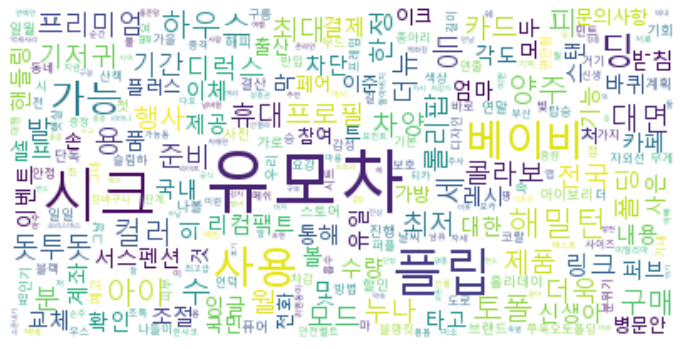

In [52]:
wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")